# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

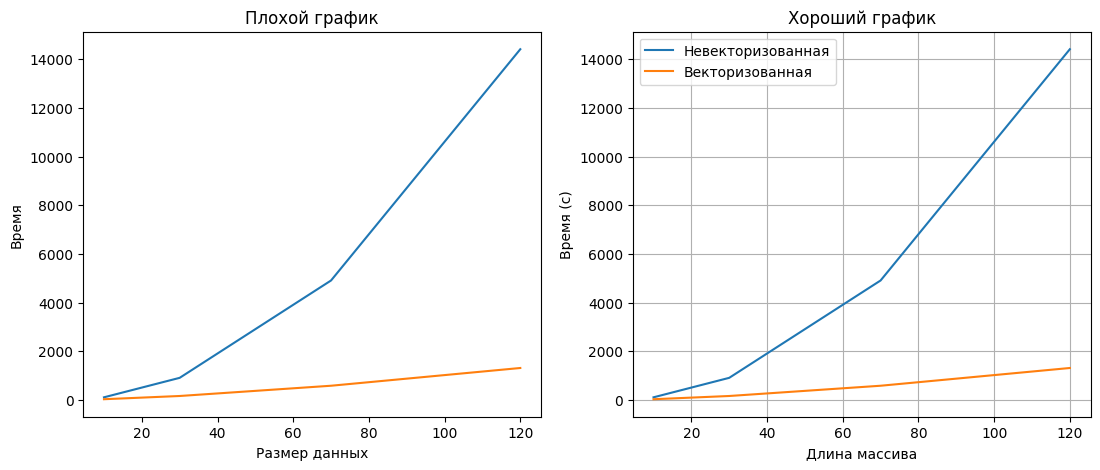

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import imageio
import scipy.spatial.distance
import random
import functions
import functions_vectorized


data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.
Я надеюсь тут имеется ввиду главная диагональ

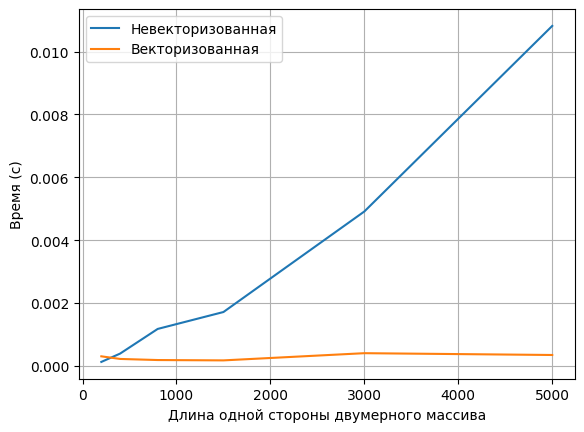

In [8]:
data_size = [200, 400, 800, 1500, 3000, 5000]
array_time_non_vec = []
array_time_vec = []
for i in (data_size):
  A = [[0] * i for j in range(i)]
  for j in range(i):
    for g in range(i):
      A[j][g] = random.randint(0, 1e5)
  B = np.array(A)
  t1 = time.time()
  res_vectorized = functions_vectorized.prod_non_zero_diag(B)
  time_vectorized = time.time() - t1
  t2 = time.time()
  res_non_vectorized = functions.prod_non_zero_diag(A)
  time_non_vectorized = time.time() - t2
  array_time_non_vec.append(time_non_vectorized)
  array_time_vec.append(time_vectorized)

fig, ax = plt.subplots()

ax.plot(data_size, array_time_non_vec, label=u"Невекторизованная")
ax.plot(data_size, array_time_vec, label=u"Векторизованная")
ax.set_xlabel(u"Длина одной стороны двумерного массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

fig.show()





* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


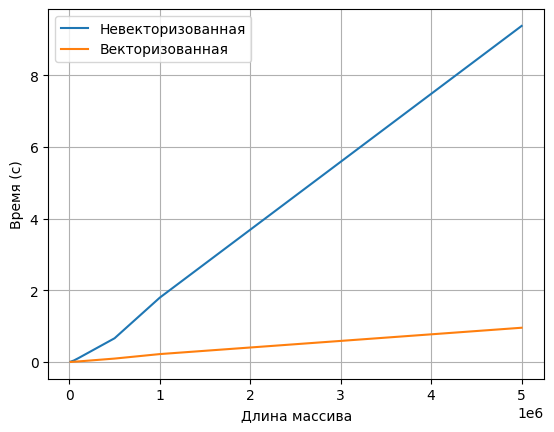

In [2]:
data_size = [15000, 50000, 100000, 500000, 1000000, 5000000]
array_time_non_vec = []
array_time_vec = []
for i in (data_size):

  A = []
  for j in range(i):
      A.append(random.randint(0, 1e5))
  C = np.array(A)
  D = C
  np.random.shuffle(D)
  B = []
  for j in range(i):
    B.append(D[j])
  t1 = time.time()
  res_vectorized = functions_vectorized.are_multisets_equal(C, D)
  time_vectorized = time.time() - t1
  t2 = time.time()
  res_non_vectorized = functions.are_multisets_equal(A, B)
  time_non_vectorized = time.time() - t2
  array_time_non_vec.append(time_non_vectorized)
  array_time_vec.append(time_vectorized)

fig, ax = plt.subplots()

ax.plot(data_size, array_time_non_vec, label=u"Невекторизованная")
ax.plot(data_size, array_time_vec, label=u"Векторизованная")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

fig.show()




* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

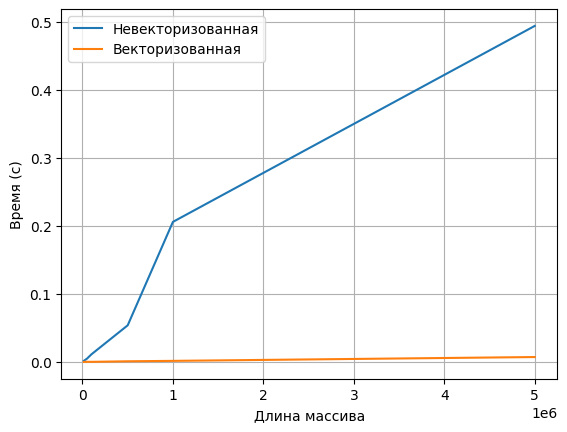

In [3]:
data_size = [15000, 50000, 100000, 500000, 1000000, 5000000]
array_time_non_vec = []
array_time_vec = []
for i in (data_size):
  A = []
  for j in range(i):
      A.append(random.randint(0, 1e3))
  B = np.array(A)
  t1 = time.time()
  res_vectorized = functions_vectorized.max_after_zero(B)
  time_vectorized = time.time() - t1
  t2 = time.time()
  res_non_vectorized = functions.max_after_zero(A)
  time_non_vectorized = time.time() - t2
  array_time_non_vec.append(time_non_vectorized)
  array_time_vec.append(time_vectorized)

fig, ax = plt.subplots()

ax.plot(data_size, array_time_non_vec, label=u"Невекторизованная")
ax.plot(data_size, array_time_vec, label=u"Векторизованная")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

fig.show()




* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


<ipython-input-7-b2cd03db3257>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_color = imageio.imread(str_file_name)


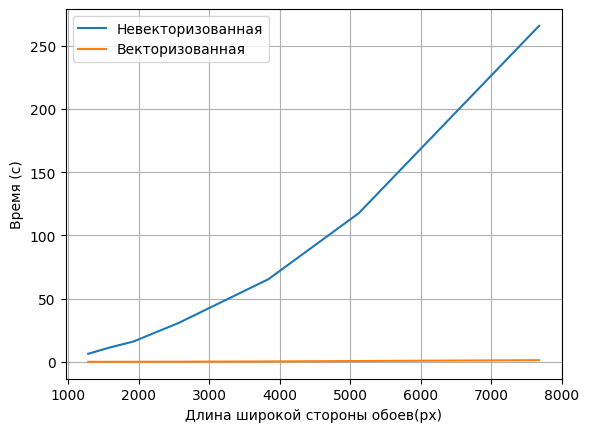

In [7]:
# image_color = imageio.imread('cat.png')
# plt.imshow(image_color)
# plt.axis('off')
# plt.title('')
# plt.show()
data_size = [1280, 1600, 1920, 2560, 3840, 5120, 7680]

coefs = [0.299, 0.587, 0.114]
array_time_non_vec = []
array_time_vec = []
for i in (data_size):
    str_file_name = str(i) + ".png"
    image_color = imageio.imread(str_file_name)

    t1 = time.time()
    image_bw_vectorized = functions_vectorized.convert_image(image_color, coefs)
    time_vectorized = time.time() - t1
    t2 = time.time()
    image_bw_non_vectorized = functions.convert_image(image_color, coefs)
    time_non_vectorized = time.time() - t2
    array_time_non_vec.append(time_non_vectorized)
    array_time_vec.append(time_vectorized)

fig, ax = plt.subplots()

ax.plot(data_size, array_time_non_vec, label=u"Невекторизованная")
ax.plot(data_size, array_time_vec, label=u"Векторизованная")
ax.set_xlabel(u"Длина широкой стороны обоев(px)")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

fig.show()



# f, (ax1, ax2, ax3) = plt.subplots(1, 3)
# ax1.imshow(image_color)
# ax1.axis('off')
# ax2.imshow(image_bw_non_vectorized, cmap='gray')
# ax2.axis('off')
# ax3.imshow(image_bw_vectorized, cmap = 'gray')
# ax3.axis('off')
# f.show()



* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

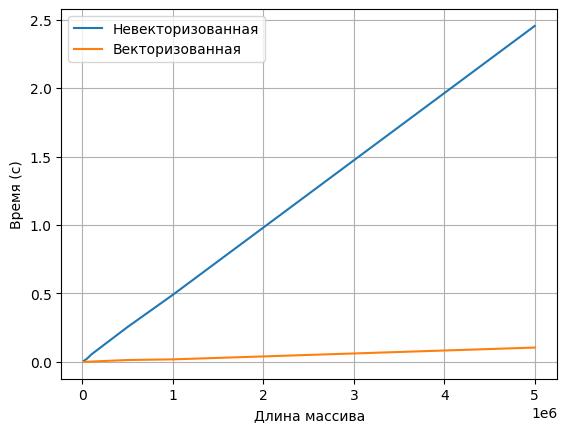

In [5]:
data_size = [15000, 50000, 100000, 500000, 1000000, 5000000]
array_time_non_vec = []
array_time_vec = []
for i in (data_size):

  A = []
  for j in range(i):
      A.append(random.randint(0, 1e5))
  B = np.array(A)
  t1 = time.time()
  res_vectorized1, res_vectorized2 = functions_vectorized.run_length_encoding(B)
  time_vectorized = time.time() - t1
  t2 = time.time()
  res_non_vectorized1, res_non_vectorized2 = functions.run_length_encoding(A)
  time_non_vectorized = time.time() - t2
  array_time_non_vec.append(time_non_vectorized)
  array_time_vec.append(time_vectorized)

fig, ax = plt.subplots()

ax.plot(data_size, array_time_non_vec, label=u"Невекторизованная")
ax.plot(data_size, array_time_vec, label=u"Векторизованная")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

fig.show()




* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

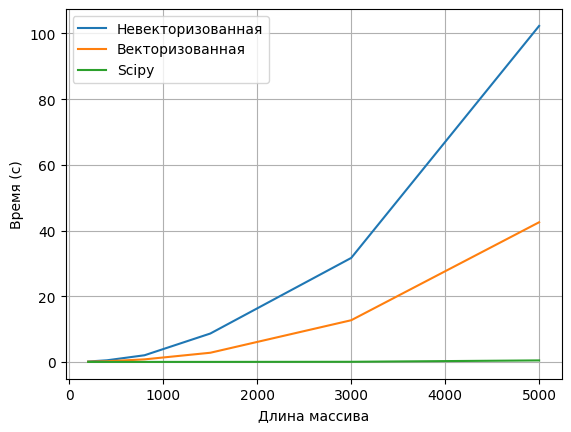

In [6]:
data_size = [200, 400, 800, 1500, 3000, 5000]
array_time_non_vec = []
array_time_vec = []
array_time_scipy = []
for i in (data_size):
  A = []
  B = []
  for j in range(i):
    a = random.randint(0, 1e4)
    b = random.randint(0, 1e4)
    c = random.randint(0, 1e4)
    d = random.randint(0, 1e4)
    A.append((a, b))
    B.append((c, d))
  C = np.array(A)
  D = np.array(B)
  t1 = time.time()
  res_vectorized = functions_vectorized.pairwise_distance(C,D)
  time_vectorized = time.time() - t1
  t2 = time.time()
  res_non_vectorized = functions.pairwise_distance(C, D)
  time_non_vectorized = time.time() - t2
  t3 = time.time()
  res_scipy = scipy.spatial.distance.cdist(A, B, 'euclidean')
  time_scipy = time.time() - t3
  if(np.array(res_non_vectorized).all() != res_vectorized.all()):
    print("Yarik gay")
  array_time_non_vec.append(time_non_vectorized)
  array_time_vec.append(time_vectorized)
  array_time_scipy.append(time_scipy)

fig, ax = plt.subplots()

ax.plot(data_size, array_time_non_vec, label=u"Невекторизованная")
ax.plot(data_size, array_time_vec, label=u"Векторизованная")
ax.plot(data_size, array_time_scipy, label=u"Scipy")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (с)")
ax.grid()
ax.legend()

fig.show()


### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

### Отчет по домашке
Выражаю *огромную благодраность* Великому **Артему Багринцевичу** за предоставленную домашку

---

#### Ну а ещё тут есть **списки**

1.   С
2.   Чиселками
3.   В
4.   Начале

---

#### А также и **списки**
*   С
*   Просто
*   Точечками

---

##### Ну и да, я, конечно, скатал эту домашку почти под чистую, но мне все же все понятно, потому что раньше с *numpy* я работал и здесь я открыл для себя не многие новые вещи.